## HELP International Case Study

#### Poblem Statement : 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

After the recent funding programmes, they have been able to raise around $ 10 million.
Now the CEO of the NGO needs to decide how to use this money strategically and effectively.

The CEOs want to choose the countries that are in the direst need of aid and need focus.

<b> Objective:</b>

- Categorise the countries using some Socio-economic and Health factors to determine the overall development of the country.
- Based on the above information accquired, provide the CEOs with top 5 coutries that needs their focus.

### Importing and Understanding the Data

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset
countries = pd.read_csv('Country-data.csv')
# Check the head of the dataset
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Inspect the various aspects of the housing dataframe
print("Data types of the columns : ")
print("----------------------------")
print(countries.info()) #Checking the data types of the columns
print()
print("Number of rows x columns : ")
print("---------------------------")
print(countries.shape) #Prints total number of rows and columns
print()
print("Statistics pertaining to numerical columns : ")
print("---------------------------------------------")
print(countries.describe()) #Prints out the statistics pertaining to Numberical columns of the data frame.

Data types of the columns : 
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None

Number of rows x columns : 
---------------------------
(167, 10)

Statistics pertaining to numerical columns : 
---------------------------------------------
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.2

In [5]:
# Check column-wise null count
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no columns with null value and hence null treatment is not requirred.

###### Mapping the values of Column "exports',"health" and "imports" to the actual values:

As given in the data dictionary, these three columns have the values that represent the percentage in GDPP columns.
It can create a lot of difference in our clustering as same percentage of different GDPP represent different numbers altogether.

In [6]:
#Defining a fucntion to be called for each row
def getValues(col, gdpp):
    return (round((col/100)*gdpp,2))

# map actual values for "exports"
countries["exports"] = countries.apply(lambda x: getValues(x.exports,x.gdpp),axis=1) 

# map actual values for "health"
countries["health"]=countries.apply(lambda x: getValues(x.health,x.gdpp),axis=1)

# map actual values for "imports"
countries["imports"]=countries.apply(lambda x: getValues(x.imports,x.gdpp),axis=1)

### Data Visualisation

We can perform univariate and Bivariate Analysis on the different coulmns to find any interesting pattern and outliers

##### Univariate Analysis

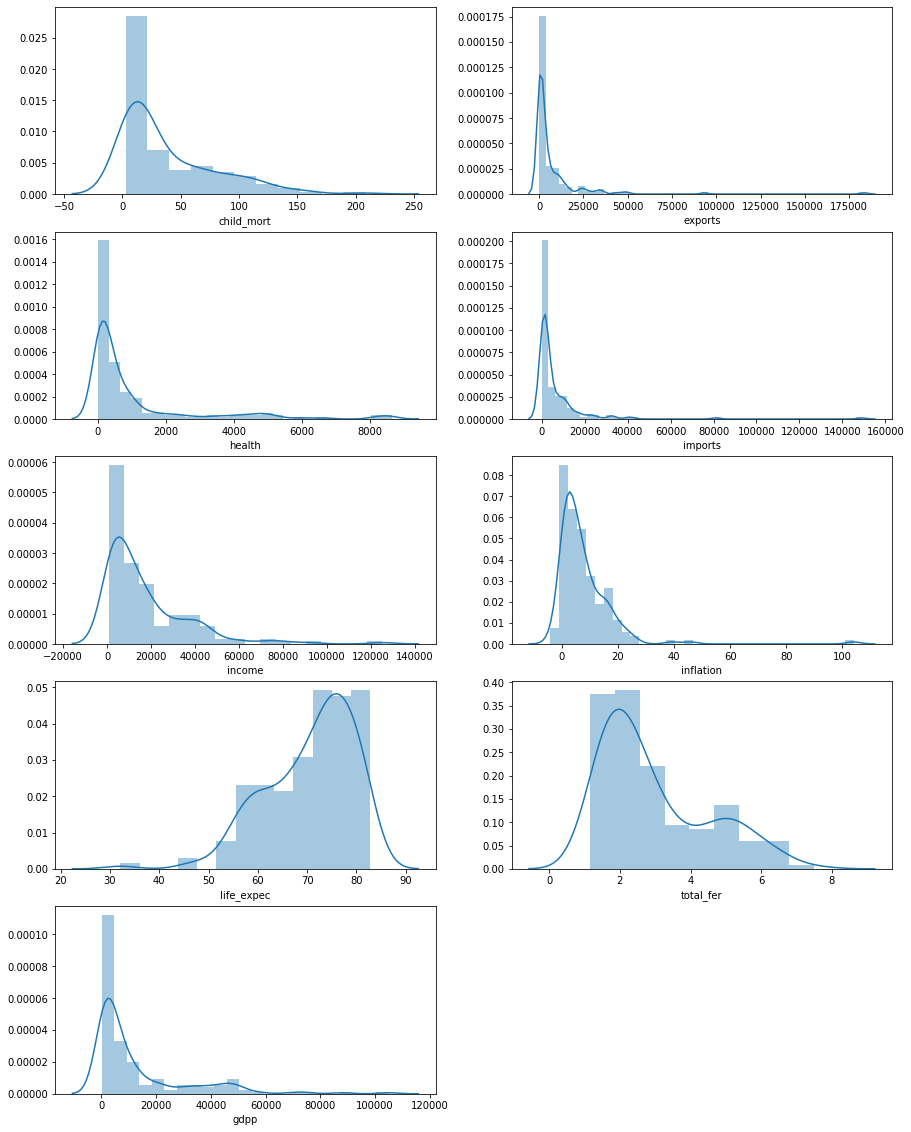

In [7]:
# Analysing each Column except "country" by plotting density plot to see the distribution of the values

plt.figure(figsize = (15,20))
features = countries.columns[1:]
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(countries[i[1]])

From Density plot, we can actually see the pattern of the data and whether it follows any normal distribution.
If a density plot is normally distributed, it will eventually not be effective for clustering.

We can see that none of the above variables have normal distribution and have trails either on the right side or left side of the plot. If we analyse further, we can also see that some of the variables are capable of having outliers.

We will do bivariate analysis before treating the outliers to see the dependency of variables on each other.

##### Bivariate Analysis:


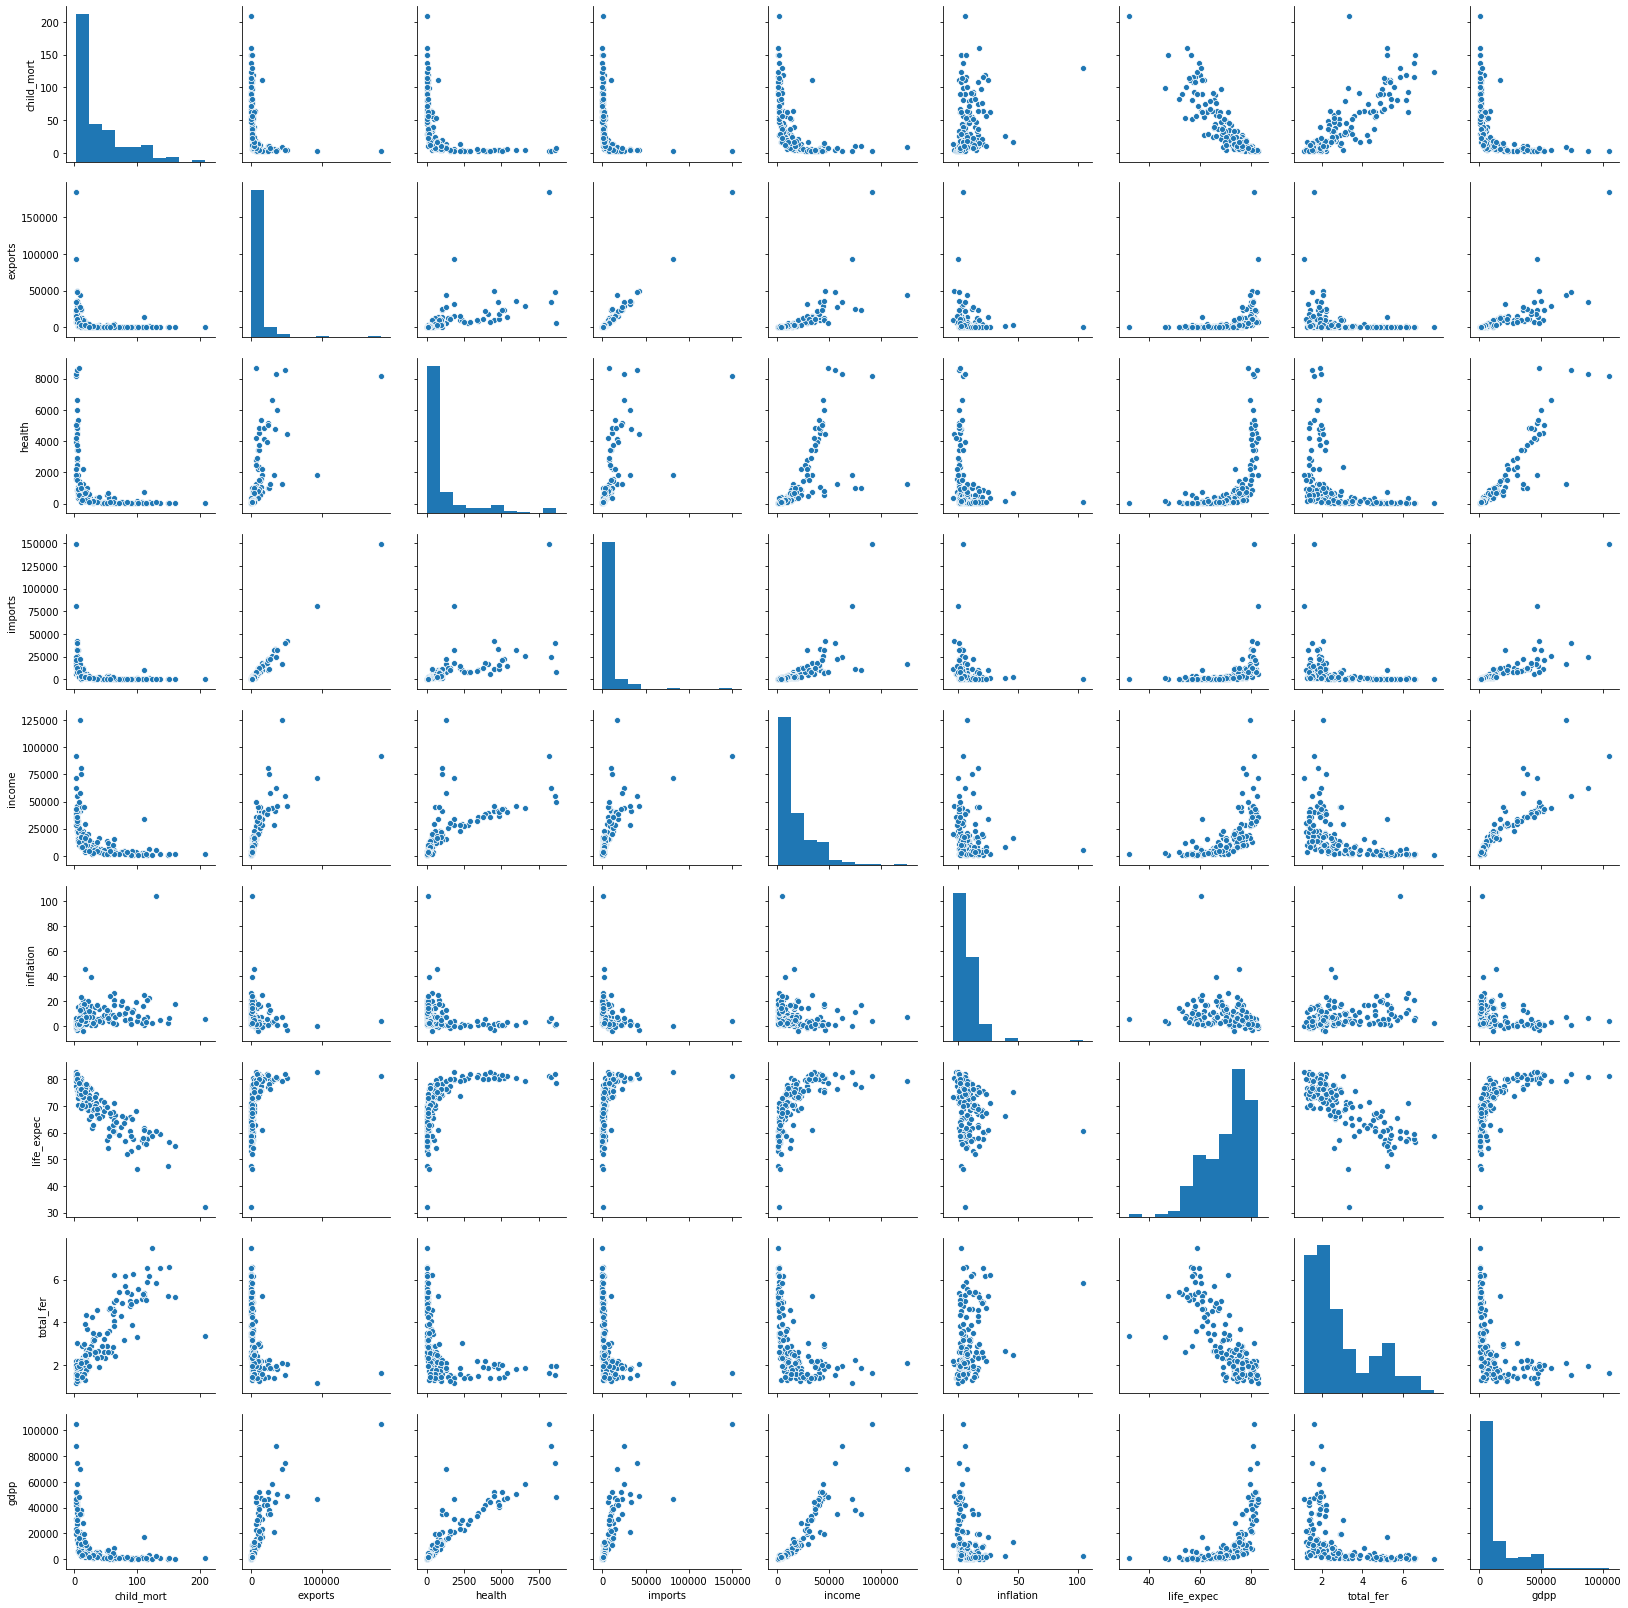

In [8]:
#plot the pairplot between numerical variables of the countries
sns.pairplot(countries[1:])
plt.show()

We have plotted the pairplot between all the variables of the data frame to actually catch a pattern if any. 

- As we can see, child_mort somewhat linear to the total_fer variable and negative linear with life_expec. 

- The gdpp is better when the child_mort is least in most of the countries and it becomes low with the increase in child_mort. 

- Likewise, we can also see that gdpp reaches its high for some high values in life expectency and remains low for lower values.

To analyse further, we can plot scatter plot between different pairs to see the performances of variables w.r.t others.


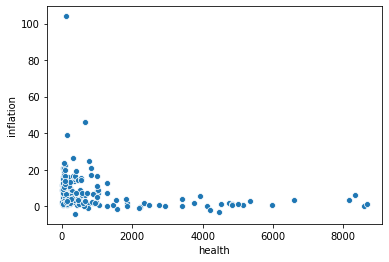

In [9]:
# scatter plot between health-inflation

sns.scatterplot(x = 'health', y = 'inflation', data = countries)

From the above scatter plot, it is very hard to infer any exact result as we cannot see pattern change in inflation w.r.t health. Although, we can atleast say that few countries with low health also have low inflation rate .

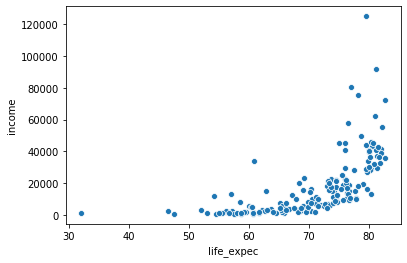

In [10]:
# scatter plot between life_expec-income

sns.scatterplot(x = 'life_expec', y = 'income', data = countries)

From the above scatter plot, we see that though the plot is not linear, the countries with high life_expec rate also have high income rate with few exception countries.

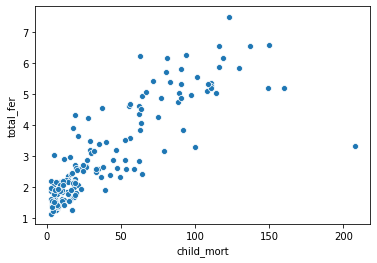

In [11]:
# scatter plot between total_fer-child_mort

sns.scatterplot(x = 'child_mort', y = 'total_fer', data = countries)

From the above scatter plot, we see there are few countries where the total fertility rate are higher even the child_mort is higher while most of the countries have low total fertility as well as low child_mort.

### Outlier Analysis

Outliers play a very vital role in clustering as the proper treatment of the outliers can lead to effective result while any mistake can change the entire result. We will analyse and do the outlier treatment.

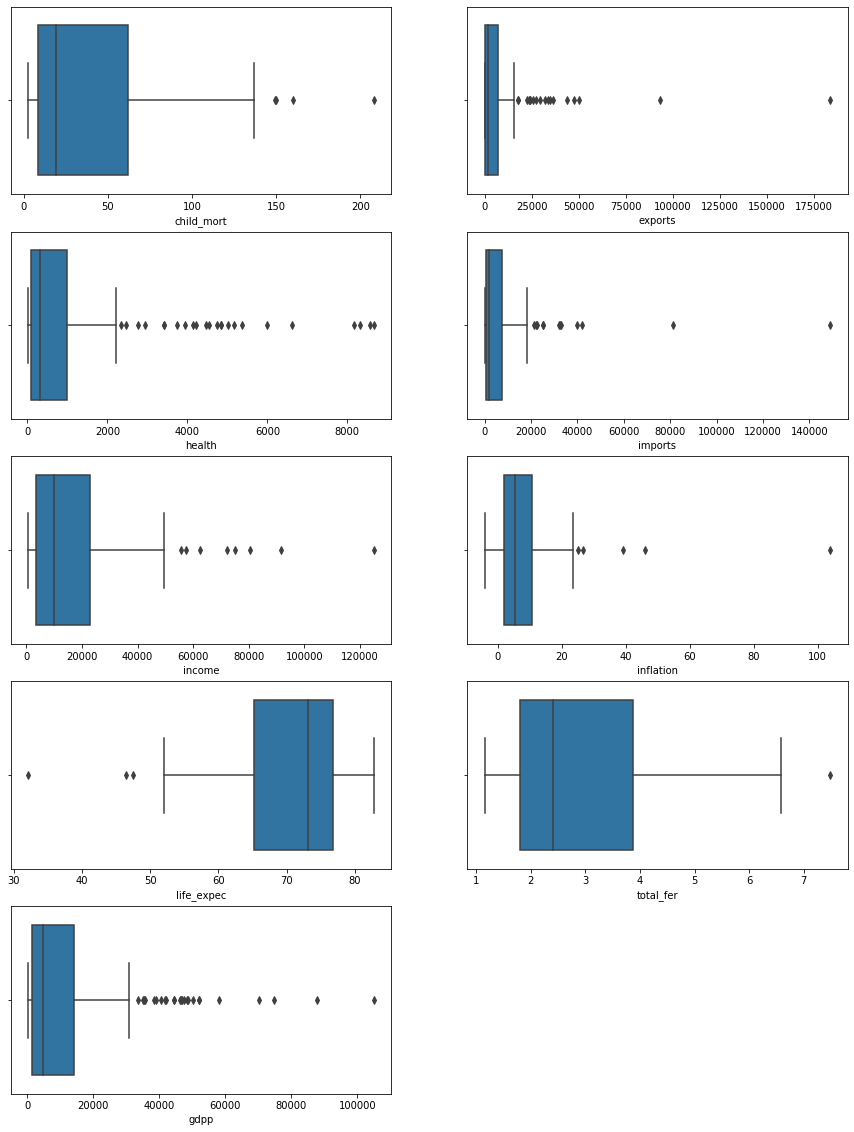

In [12]:
# Plotting boxplots of all the numeric variables to see the outliers if any.

plt.figure(figsize = (15,20))
features = countries.columns[1:]
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(countries[i[1]])

From the above boxplots of variables, we can see that all of the variables are having outliers.
There can be two treatments that can be performed on outlier treatment:
- Removal of the Outlier rows if the column is not contributing mostly or we have enough data
- Capping the outliers if they are playing vital role in predicting the result.

For our dataframe, we will consider the second option.

###### Capping the outliers

The objective of outlier treatment is to reduce the effect of the outlier rather than completly removing it.

Child_mort  shows the mortality rate in children in a country. It means the country with high mortality can be a possible country in need of aid and if we cap the upper outliers in this variable, it can mispredict the clusters and the data can be lost.

Inflation shows the purchasing power of the country's currency annually according to the total gdp, so if any country has higher inflation rate, it can mean that the country is in need of the aid. So, here also the capping should be avoided for upper outliers.

And from the boxplots of child_mort and inflation, we see that there is no outlier in lower end, so the outlier treatment can be avoided for these two.

For income,exports,imports,life_expec and gdpp, we can cap the upper outliers and leave lower outliers as the countries with lower values in these variables can be in the need of aid. Since, life_expec doesnt have upper range outliers, we can avoid the capping for it.

Health and total_fer can be capped on both lower and upper range

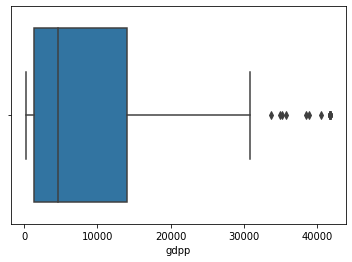

In [13]:
# Capping the gdpp on upper range.

# We are capping to 90th percentile as with 99 and 95 percentile, the outliers were still not in exceptable range
# We have not reduced the capping percentile below 90 because our aim is to reduce the effect of outliers without much disturbance to distribution of the data

q4 = countries['gdpp'].quantile(0.90) 

countries['gdpp'][countries['gdpp']>=q4] = q4

sns.boxplot(countries['gdpp'])

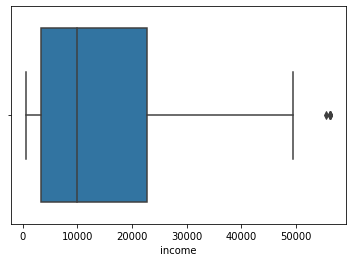

In [14]:
# Capping the income on upper range

# We are capping to 96th percentile because at 95, there can be possibility of change in the distribution of data
# and with 99, the outliers were still not in exceptable range

q4 = countries['income'].quantile(0.96)

countries['income'][countries['income']>=q4] = q4

sns.boxplot(countries['income'])

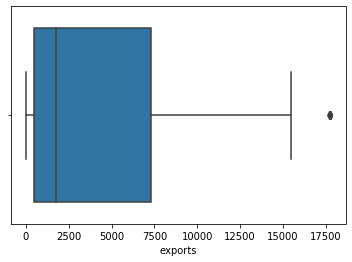

In [15]:
# Capping the exports on upper range

# We are capping to 90th percentile as with 99 and 95 percentile, the outliers were still not in exceptable range

q4 = countries['exports'].quantile(0.90)

countries['exports'][countries['exports']>=q4] = q4

sns.boxplot(countries['exports'])

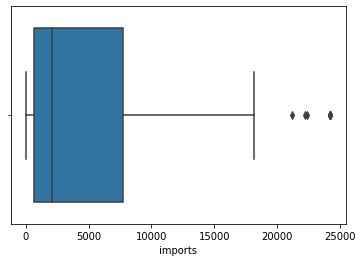

In [16]:
# Capping the imports on upper range

# We are capping to 95th percentile as with 99 percentile, the outliers were still not in exceptable range

q4 = countries['imports'].quantile(0.95)

countries['imports'][countries['imports']>=q4] = q4

sns.boxplot(countries['imports'])

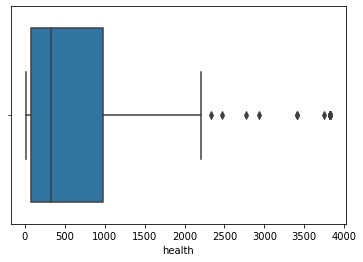

In [17]:
# Capping the health on upper range

# We are capping to 90th percentile as with 99 and 95 percentile, the outliers were still not in exceptable range

q4 = countries['health'].quantile(0.90)

countries['health'][countries['health']>=q4] = q4

sns.boxplot(countries['health'])

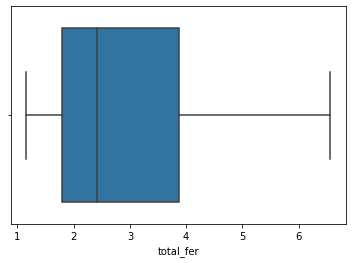

In [18]:
# Capping the imports on upper range

# We can also leave this outlier untreated as it doesnot lie very far from the whisker 

q4 = countries['total_fer'].quantile(0.99)

countries['total_fer'][countries['total_fer']>=q4] = q4

sns.boxplot(countries['total_fer'])

### Hopkins Test

Now, after we have done all the EDA and Outlier treatment, it is actually advisable and a good practice to check if the data can be clustered or not.

To check that, we can use Hopkins Test.

The clustering can be decided based on the following range of Hopkins score:
- Below 50 : Data is not good for clustering
- 50-70 : Data can be clustered but will not be that precise
- 80-100 : Very good set of data for clustering

In [19]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(countries.drop('country',axis = 1))

0.8518180481725718

The value of Hopkins for our dataframe lies between 80-100, which shows that we have good data and it is suitable for Clustering.

Now that we checked if the data is suitable, we will start the clustering by first scaling the data so that the variance is same across the variables.

### Scaling

In [21]:
# we will remove the ID i.e country column which is not numerical before scaling.

df_countries = countries.drop('country',axis=1)

In [22]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_countries = scaler.fit_transform(df_countries)

# the scaler returns numpy array after scaling, so it is required to convert the result into dataframe
df_countries = pd.DataFrame(df_countries)
df_countries.columns = countries.columns[1:] # except the country column
df_countries.head() # after scaling the data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.797286,-0.676931,-0.732728,-0.926860,0.157336,-1.619092,1.926396,-0.786811
1,-0.538949,-0.611636,-0.490348,-0.472182,-0.395492,-0.312347,0.647866,-0.865054,-0.531304
2,-0.272833,-0.514980,-0.557986,-0.560152,-0.205808,0.789274,0.670423,-0.034983,-0.504576
3,2.007808,-0.432103,-0.628473,-0.543087,-0.652873,1.387054,-1.179234,2.153997,-0.571758
4,-0.695634,0.138833,-0.104136,0.306422,0.190163,-0.601749,0.704258,-0.543736,0.054549


### Clustering

In [23]:
# Importing the libaries which can be used for Clustering

from sklearn.metrics import silhouette_score # Library used for calculating Silhoutte score
from sklearn.cluster import KMeans # Library for KMeans

Now that we have everything in place, we will start the process of clustering.

First, we will find the optimal number of clusters by using different approaches. 
- Elbow Curve
- Silhouette Score

##### Silhouette Score

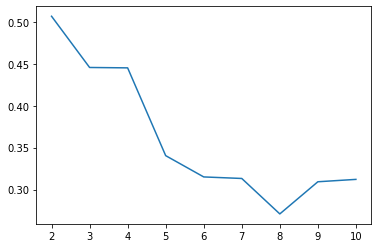

In [24]:
ss = []  # to store the calculated values of silhoutte_score for each iteration
for k in range(2,11):  # for clusters 2 to 10
    kmeans = KMeans(n_clusters = k,random_state=50).fit(df_countries)
    ss.append([k, silhouette_score(df_countries, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

We will choose that value of k where the silhouette score is the highest. In the above plot of silhouette scores, we see that 2 has the highest score. We will not choose 2 because it is not advisable to select 2 clusters until it is business requirement as it will be just like dividing the data into two halves. So, we will choose next highest score which we get at 3. So, according to silhouette score, we will choose 3 as no of clusters.

##### Elbow Curve

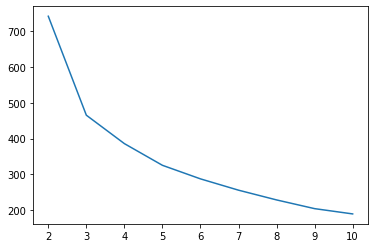

In [25]:
ssd = [] # to store the SSD for each iteration
for k in range(2, 11): # for clusters 2 to 10
    kmean = KMeans(n_clusters = k).fit(df_countries)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

After plotting the ssd values for elbow curve, we will look for the first bent. Here we see that the first bent is at 3. And for Silhouette, we got n as 3 itself, so it is safe to use 3 as both the plots are favouring that number of custers.

We will be clustering using both :
- K-Means Algorithm
- Hierarchical Algorithm


#### K-Means

In [26]:
# K=3
kmean = KMeans(n_clusters = 3, random_state = 101) # random_state is a flag to mark our process of calculation between iterations
kmean.fit(df_countries)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [27]:
# We will get the labels of the clusters formed.

label = pd.DataFrame(kmean.labels_, columns = ['label'])

# Making a copy Dataframe
grouped_countries = countries.copy()

In [28]:
#Concatenating the labels with our dataframe

grouped_countries = pd.concat([grouped_countries, label ], axis =1)

grouped_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.61,1514.37,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2


In [29]:
# How many datapoints we have in each cluster

grouped_countries.label.value_counts()

2    84
0    45
1    38
Name: label, dtype: int64

We can see that the cluster 2 has highest number of countries falling in it while cluster 1 and 0 are having countries with just a difference of 7 data points.


We will visualise the distribution of data into the respective clusters.
Our variables of concern are gdpp, child_mort and income.

We will plot scatter plot to see the difference in the clusters for the combination of these three variables.

##### Data Visualisation based on the clusters they are falling in

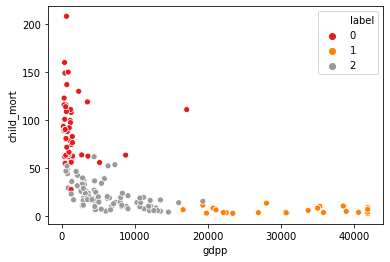

In [30]:
# Scatter plot between gdpp and child_mort

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = grouped_countries, palette = 'Set1')

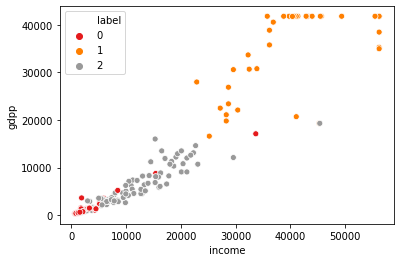

In [31]:
# Scatter plot between income and gdpp

sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = grouped_countries, palette = 'Set1')

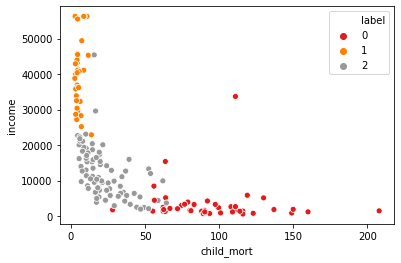

In [32]:
# Scatter plot between child_mort and income

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = grouped_countries, palette = 'Set1')

From the above three pairs scatter plot, we see that all three clusters are highly ditinguishable and segregated properly with just few data points floating outside their own cluster but still the result obtained is accepatble.

We will now plot the bar garph for the gdpp,income and child_mort with respect to clusters(label) for cluster profiling.

##### Cluster Profiling

In [33]:
# Cluster Profiling: GDPP, CHILD_MORT and INCOME

grouped_countries.drop('country',axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,94.537778,790.475333,87.891778,731.346667,3312.733333,11.997000,59.220000,5.080827,1633.600000
1,5.407895,14017.831579,2808.156632,15494.982632,40570.842105,2.930842,79.855263,1.785789,34825.789474
2,22.992857,2650.653333,395.866429,2817.559405,11924.880952,7.718202,72.421429,2.319762,6123.833333


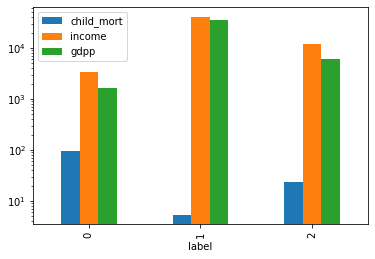

In [34]:
# Plot the bar graph grouped by labels to see the cluster which contains the country having dire need for AID.

df = grouped_countries.drop(['exports', 'health', 'imports','inflation','life_expec','total_fer','country'],axis = 1)
df.groupby('label').mean().plot(kind = 'bar',logy=True)

From the above plot, we see that the cluster 1 is clearly representing the top performing countries with low child_mort, high gdpp and income while the cluster 0 has highest child_mort, lowest gdpp and income. Cluster 2 represents the list the countries which not as good as countries in cluster 1 but are not in need of the AID. So, the cluster 0 represents the countries which needs to be focused on by the CEOs of HELP and are in need of the AID.

In [35]:
# Once the cluster has been identified, we will filter the data for that clster

grouped_countries[grouped_countries['label'] ==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112     

In [36]:
# We will filter and select the top 5 countries having low gdpp, high child_mort and low income in cluster 0.

grouped_countries[grouped_countries['label'] ==0].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.2600,231,0
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.0200,327,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.5400,334,0
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,6.5636,348,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.2000,399,0


so, from the K-Mean clustering, we have top 5 countries who are need for AID :
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

We will also do Hierarchical Clustering to find the top 5 countries.

#### Hierarchical Clustering

In [37]:
# importing the libaries for hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

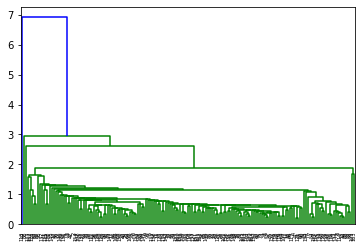

In [38]:
# Single Linkage

mergings = linkage(df_countries,method='single',metric='euclidean')

dendrogram(mergings)
plt.show()

In [39]:
# cut tree function to get the clusters to which each data belongs.

h_labels = cut_tree(mergings,n_clusters=3).reshape(-1,) # reshape is required to get the labels as horizontal array, 
                                                        # so that it will be convinient to assign them to our dataframe
h_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

From the above dendrogram, we see that single linkage doesn't produce a good enough dendrogram for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

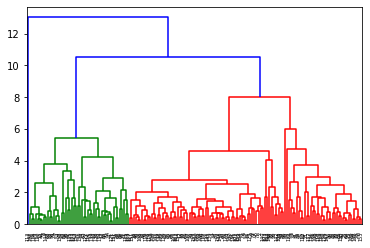

In [40]:
# Complete Linkage

mergings = linkage(df_countries,method='complete',metric='euclidean')

dendrogram(mergings)
plt.show()

From the above dendrogram obtained from the complete linkage, we see clear segregation of clusters and is more suitable to draw inferences from.
The y axis represents the height of the dendrogram and any horizontal line drawn through these heights, will cut the dendrogram giving the intersections as the number of clusters.

From here, we can see that there are majorly three clusters and segregated and clean. So we will go with three clusters and cut the dendrogram for 3 clusters using cut_tree function.

In [41]:
# cut tree function to get the clusters to which each data belongs.

h_labels = cut_tree(mergings,n_clusters=3).reshape(-1,) # reshape is required to get the labels as horizontal array, 
                                                        # so that it will be convinient to assign them to our dataframe
h_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# Assigning the labels got from hierarchical clustering to the grouped dataframe
grouped_countries['h_label'] = h_labels

grouped_countries.head() # label column represents the cluster from K-Means and h_label represents from hierarchical clustering

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,h_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.61,1514.37,5900.0,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2,1


In [43]:
# To check the distribution of data in each of the three clusters

grouped_countries.h_label.value_counts()

0    116
1     50
2      1
Name: h_label, dtype: int64

From the distribution of the data, we see that cluster 2 has only one country and cluster 0 has highest number of countries while cluster 1 falls in between.

We will visualise the data distributed among the clusters using gdpp, income and child_mort using scatter plot. We can also use box plot but in this case, the box plot doesnt give the clear picture and hence using scatter plot.

##### Data Visualisation based on the clusters they are falling in

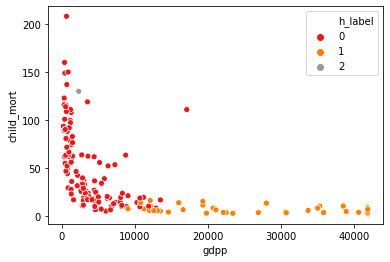

In [44]:
# scatter plot between the gdpp and child_mort according to h_label

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'h_label', data = grouped_countries, palette = 'Set1')

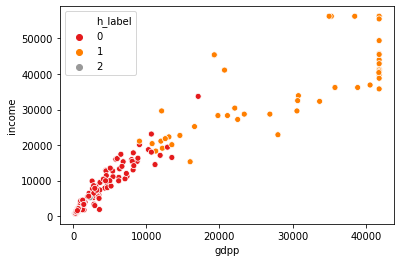

In [45]:
# scatter plot between the gdpp and income according to h_label

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'h_label', data = grouped_countries, palette = 'Set1')

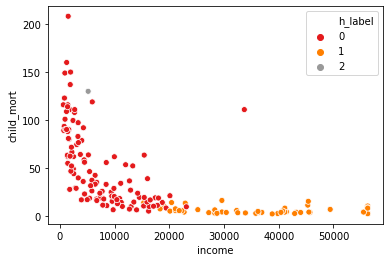

In [46]:
# scatter plot between the income and child_mort according to h_label

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'h_label', data = grouped_countries, palette = 'Set1')

From all the plots of three pair, we see that the cluster 0 and 1 are distinguishable but the cluster 2 is getting mixed with the data points in cluster 0.

We will now plot the bar garph for the gdpp,income and child_mort with respect to clusters(h_label) for cluster profiling.

##### Cluster Profiling

In [47]:
# Cluster Profiling: GDPP, CHILD_MORT and INCOME

grouped_countries.drop('country',axis = 1).groupby('h_label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
h_label,,,,,,,,,,
0,51.212069,1418.3625,237.830086,1550.391983,7486.318966,8.964259,67.118966,3.407476,3698.396552,1.241379
1,6.410000,12515.6866,2324.228840,13562.880800,36377.840000,3.114240,78.730000,1.805000,29599.000000,1.240000
2,130.000000,589.4900,118.130000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,0.000000


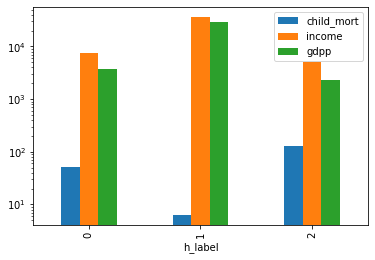

In [48]:
# Cluster profiling using gdpp, income and child_mort

df = grouped_countries.drop(['exports', 'health', 'imports','inflation','life_expec','total_fer','country','label'],axis = 1)
df.groupby('h_label').mean().plot(kind = 'bar',logy=True)

From the above plot, we see that the cluster 1 is clearly representing the top performing countries with low child_mort, high gdpp and income while the cluster 2 has highest child_mort, lowest gdpp and income. But also, Cluster 2 represents only one country, while cluster 0 represents the countries which are poor performing but is better than one country which is present in cluster 2.

We can draw the final inference by actually analysing both cluster 0 and 2.

In [49]:
# We will filter and select the the country having low gdpp, high child_mort and low income in cluster 2.

grouped_countries[grouped_countries['h_label'] ==2].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,h_label
113,Nigeria,130.0,589.49,118.13,405.42,5150.0,104.0,60.5,5.84,2330,0,2


In [50]:
# We will now filter and select the the country having low gdpp, high child_mort and low income in cluster 0.

grouped_countries[grouped_countries['h_label'] ==0].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,h_label
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.2600,231,0,0
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.0200,327,0,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.5400,334,0,0
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,6.5636,348,0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.2000,399,0,0


From the above two filtering of cluster 2 and 0, we see that the top 5 countries with low gdpp, low income and high child_mort in cluster 0 are actually performing poorly than the country in cluster 2.

The countries in cluster 0 have lower gdpp and income than the country in cluster 2 while it has lower child_mort than the one in cluster 2. So, we will decide to take up the cluster 0 as the cluster of concern and the one which CEOs of HELP should focus on rather than cluster 2.

So, while the mean of gdpp, income and child_mort of country in cluster 2 is low performing than the countries in cluster 0 but there are countries in cluster 0 which are much worse performing than the cluster 2.  

The top 5 countries obtained from hierarchical clustering are :

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone


###### According to K-Mean and Hierarchical clustering , we have reached the decision that the countries : 

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
###### are the ones which requires HELP CEOs attention and need the AID to pull themselves up.